In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

---

# 1. hackle_events

In [2]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"
# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/hackle/hackle_events.parquet'

# 데이터 불러오기
hackle_events_df = pd.read_parquet(gcs_path, engine='pyarrow')
hackle_events_df

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,,,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,,,26.0,174.0,4729.0,NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,,,61.0,44.0,142.0,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,,,119.0,545.0,3287.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11441314,fffff54e-e730-418f-8080-4eff7e2641f2,2023-08-08 01:40:00,view_timeline_tap,n9RSY5wNfvURIV3sKeXZiYWiVSD3,fffff54e-e730-418f-8080-4eff7e2641f2,,,27.0,92.0,326.0,NaN
11441315,fffff57d-6c79-46b3-a87b-4bfa900ef11b,2023-07-23 09:30:22,skip_question,CB3F11FD-4B78-4496-96E7-3B4174C123E9,fffff57d-6c79-46b3-a87b-4bfa900ef11b,,,0.0,0.0,300.0,799.0
11441316,fffff632-2d70-4190-addd-6ae2f2399876,2023-07-18 18:13:30,view_lab_tap,AwpRr0ll7bTfFV22MIXHDASEpz72,fffff632-2d70-4190-addd-6ae2f2399876,,,29.0,97.0,284.0,NaN
11441317,fffffb07-af2f-4cce-a26e-1dcc97c74b14,2023-07-21 15:37:27,view_timeline_tap,H8oiWwKxRiYByNykbb2GsVYd8JU2,fffffb07-af2f-4cce-a26e-1dcc97c74b14,,,49.0,527.0,932.0,NaN


In [15]:
hackle_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ms]
 2   event_key       object        
 3   session_id      object        
 4   id              object        
 5   item_name       object        
 6   page_name       object        
 7   friend_count    float64       
 8   votes_count     float64       
 9   heart_balance   float64       
 10  question_id     float64       
dtypes: datetime64[ms](1), float64(4), object(6)
memory usage: 960.2+ MB


In [16]:
hackle_events_df.isnull().sum()

event_id                 0
event_datetime           0
event_key                0
session_id               0
id                       0
item_name                0
page_name                0
friend_count        752556
votes_count         754554
heart_balance       728643
question_id       10991835
dtype: int64

In [39]:
# 실제 값 있는 row 수
print("item_name 값 있는 row 수:", hackle_events_df['item_name'].notnull().sum())
print("page_name 값 있는 row 수:", hackle_events_df['page_name'].notnull().sum())

# 고유값 상위 분포
print(hackle_events_df['item_name'].value_counts().head(10))
print(hackle_events_df['page_name'].value_counts().head(10))


item_name 값 있는 row 수: 11441319
page_name 값 있는 row 수: 11441319
item_name
           11428280
무료충전소          7617
777 하트         3258
1000 하트        1112
200 하트         1001
4000 하트          51
Name: count, dtype: int64
page_name
           10652540
home         518348
notice       229358
profile       14627
학년선택          10714
반선택            8592
학교선택           1904
번호인증           1246
아이디입력          1072
성별선택           1057
Name: count, dtype: int64


In [40]:
hackle_events_df[hackle_events_df['event_key'] == 'view_item']['item_name'].notnull().mean()


nan

In [41]:
both_missing = hackle_events_df['item_name'].isnull() & hackle_events_df['page_name'].isnull()
print("두 컬럼 모두 비어 있는 row 비율:", both_missing.mean() * 100, "%")


두 컬럼 모두 비어 있는 row 비율: 0.0 %


In [42]:
hackle_events_df[hackle_events_df['item_name'].notnull()]['event_key'].value_counts()
hackle_events_df[hackle_events_df['page_name'].notnull()]['event_key'].value_counts()


event_key
view_lab_tap                         1266665
view_timeline_tap                    1194508
$session_start                       1036852
launch_app                            986388
click_question_open                   816801
click_bottom_navigation_questions     769163
click_bottom_navigation_profile       653507
$session_end                          649658
click_bottom_navigation_timeline      536051
skip_question                         454981
click_bottom_navigation_lab           453683
view_profile_tap                      413294
view_questions_tap                    353400
click_appbar_alarm_center             253541
click_notice_detail                   229358
click_question_start                  220385
click_random_ask_shuffle              184217
click_attendance                      157737
complete_question                     154105
click_appbar_chat_rooms               148422
click_question_ask                    136766
click_question_share                   69241


#### item_name, page_name이 공백이 아닌 유저

In [43]:
# 1. item_name이 공백이 아닌 유저
item_users = set(hackle_events_df[hackle_events_df['item_name'].str.strip() != '']['id'])

# 2. page_name이 공백이 아닌 유저
page_users = set(hackle_events_df[hackle_events_df['page_name'].str.strip() != '']['id'])

# 3. 둘 다 있는 유저
both_users = item_users & page_users

# 4. 개수 출력
print(f"item_name이 있는 유저 수: {len(item_users):,}")
print(f"page_name이 있는 유저 수: {len(page_users):,}")
print(f"둘 다 있는 유저 수: {len(both_users):,}")


item_name이 있는 유저 수: 13,039
page_name이 있는 유저 수: 788,779
둘 다 있는 유저 수: 0


In [52]:
hackle_events_df[hackle_events_df['item_name'].str.strip() != '']['event_key'].value_counts().head(10)

event_key
click_purchase    13039
Name: count, dtype: int64

- 상품 구매 관련 이벤트에만 item_name이 채워짐
   - 아마도 하트 구매, 아이템 결제, 무료충전소 클릭 등에서만 발생
   - 해당 유저는 "실제 과금/구매 또는 광고 참여 행동"을 보인 유저

In [53]:
hackle_events_df[hackle_events_df['page_name'].str.strip() != '']['event_key'].value_counts().head(10)


event_key
click_notice_detail     229358
click_question_start    220385
click_attendance        157737
click_question_ask      136766
view_signup              25630
click_profile_ask        14627
click_friend_invite       3221
click_invite_friend       1054
click_notice                 1
Name: count, dtype: int64

→ 대부분 서비스 내부 기능 탐색, 참여, 진입을 의미                 
→ 유입 이후의 행동 기반 분석에 사용 가능            

In [55]:
# 두 유저군의 friend/vote/heart 차이

user_summary_df = (
    hackle_events_df
    .groupby('id')[['friend_count', 'votes_count', 'heart_balance']]
    .max()  # 또는 .mean(), .last()
    .reset_index()
)


In [ ]:
# 유저 ID 추출
item_user_ids = set(hackle_events_df[hackle_events_df['item_name'].str.strip() != '']['id'])
page_user_ids = set(hackle_events_df[hackle_events_df['page_name'].str.strip() != '']['id'])

# user_type 열 생성
def classify_user(uid):
    if uid in item_user_ids:
        return 'item_user'
    elif uid in page_user_ids:
        return 'page_user'
    else:
        return 'other'

user_summary_df['user_type'] = user_summary_df['id'].apply(classify_user)


In [57]:
user_summary_df.groupby('user_type')[['friend_count', 'votes_count', 'heart_balance']].mean()


,friend_count,votes_count,heart_balance
user_type,,,
item_user,48.364905,189.858808,1376.577805
other,54.465785,258.005967,16137.693244
page_user,52.876720,249.027746,18212.326916


- item_user는 하트가 적다?
→ 실제 구매 전 단계에서 이탈했을 가능성           
→ 또는 충전 UI만 진입하고 전환 실패한 사용자일 수 있음                                   
                      
- page_user는 평균적으로 하트가 많다                                                         
→ UI 탐색 활동이 많고, 다양한 기능 사용을 통해 보상 획득                                       
→ 활성 유저 또는 충성 유저 후보                      
                     
- other는 은근히 우수한 유저다                                      
→ 명시적으로 구매나 탐색 기록은 없지만 보유 자산은 높음   

In [17]:
hackle_events_df.describe(include='all')

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
count,11441319,11441319,11441319,11441319,11441319,11441319,11441319,1.068876e+07,1.068676e+07,1.071268e+07,449484.000000
unique,11441319,NaN,44,253616,11441319,6,13,NaN,NaN,NaN,NaN
top,00000533-3f1c-4b3b-81f1-0c8f35754b4e,NaN,view_lab_tap,A40CA2FA-CEB6-4E94-857D-7C229ECC2598,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
freq,1,NaN,1266665,8157,1,11428280,10652540,NaN,NaN,NaN,NaN
mean,NaN,2023-07-29 01:58:17.236000,NaN,NaN,NaN,NaN,NaN,5.434357e+01,2.572742e+02,1.626929e+04,2766.385262
min,NaN,2023-07-18 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,99.000000
25%,NaN,2023-07-22 21:31:17,NaN,NaN,NaN,NaN,NaN,3.200000e+01,9.700000e+01,4.340000e+02,1393.000000
50%,NaN,2023-07-28 17:08:58,NaN,NaN,NaN,NaN,NaN,4.900000e+01,2.100000e+02,1.249000e+03,2569.000000
75%,NaN,2023-08-04 17:59:10,NaN,NaN,NaN,NaN,NaN,7.100000e+01,3.620000e+02,3.188000e+03,4459.000000
max,NaN,2023-08-10 23:59:59,NaN,NaN,NaN,NaN,NaN,1.365000e+03,3.017000e+03,8.849998e+08,5133.000000


#### 이벤트 유형(event_key) 분포

In [18]:
hackle_events_df['event_key'].value_counts()

event_key
view_lab_tap                         1266665
view_timeline_tap                    1194508
$session_start                       1036852
launch_app                            986388
click_question_open                   816801
click_bottom_navigation_questions     769163
click_bottom_navigation_profile       653507
$session_end                          649658
click_bottom_navigation_timeline      536051
skip_question                         454981
click_bottom_navigation_lab           453683
view_profile_tap                      413294
view_questions_tap                    353400
click_appbar_alarm_center             253541
click_notice_detail                   229358
click_question_start                  220385
click_random_ask_shuffle              184217
click_attendance                      157737
complete_question                     154105
click_appbar_chat_rooms               148422
click_question_ask                    136766
click_question_share                   69241


#### 사용자별 가장 많이 발생한 이벤트 유형

In [19]:
# 사용자별, 이벤트별 발생 횟수 집계
user_event_counts = hackle_events_df.groupby(['id', 'event_key']).size().reset_index(name='count')

# 사용자별 가장 많이 발생한 이벤트만 추출
user_top_events = user_event_counts.sort_values(['id', 'count'], ascending=[True, False]) \
                                   .drop_duplicates(subset=['id'])

# 결과 확인
user_top_events.head()



,id,event_key,count
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,$session_start,1
1,00000716-27e9-4e72-a602-d0ce61784b06,click_question_open,1
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,click_bottom_navigation_profile,1
3,00000981-5e2a-4111-993e-4f1891ad9a53,view_shop,1
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,click_bottom_navigation_lab,1


In [20]:
# 사용자들이 가장 많이 한 top 이벤트 유형은?

user_top_events['event_key'].value_counts().head(10)


event_key
view_lab_tap                         1266665
view_timeline_tap                    1194508
$session_start                       1036852
launch_app                            986388
click_question_open                   816801
click_bottom_navigation_questions     769163
click_bottom_navigation_profile       653507
$session_end                          649658
click_bottom_navigation_timeline      536051
skip_question                         454981
Name: count, dtype: int64

#### 시간 흐름에 따른 이벤트 수 추이

<Axes: title={'center': '일별 이벤트 발생 수'}, xlabel='date'>

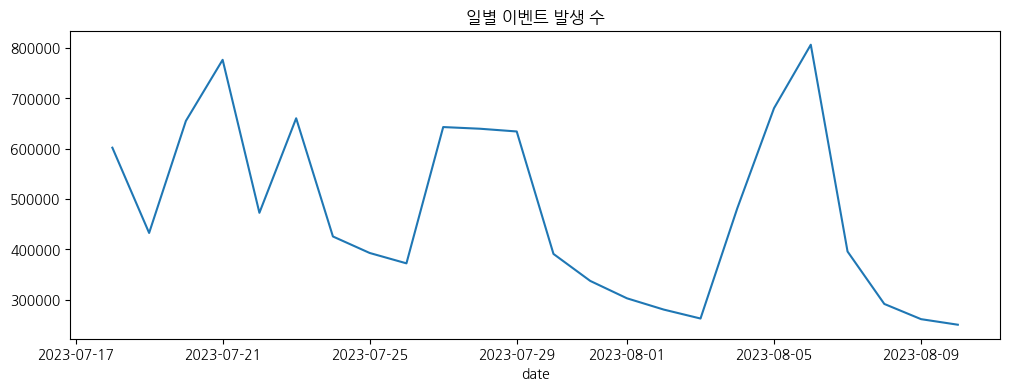

In [21]:
hackle_events_df['event_datetime'] = pd.to_datetime(hackle_events_df['event_datetime'])
hackle_events_df['date'] = hackle_events_df['event_datetime'].dt.date

hackle_events_df['date'].value_counts().sort_index().plot(figsize=(12, 4), title='일별 이벤트 발생 수')

- 피크 (최대): 약 8월 6일 경, 800,000건 이상의 이벤트 발생 → 사용자 활동 집중
- 최저점: 약 8월 2일 경, 250,000건 이하 → 활동 급감
- 전반적으로 주기적 패턴(증감 반복)이 보임 → 주말/주중 차이일 가능성
- 7월 17일부터 8월 10일까지 약 25일간의 활동 추이

#### 요일별 이벤트 평균 수

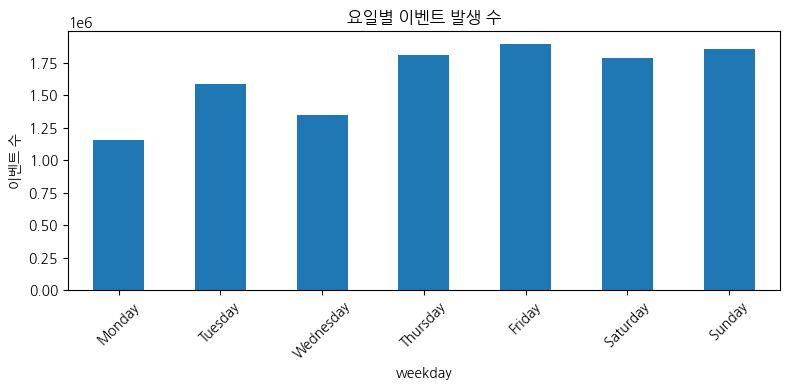

In [22]:
hackle_events_df['event_datetime'] = pd.to_datetime(hackle_events_df['event_datetime'])
hackle_events_df['weekday'] = hackle_events_df['event_datetime'].dt.day_name()

weekday_counts = hackle_events_df.groupby('weekday').size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

weekday_counts.plot(kind='bar', title='요일별 이벤트 발생 수', figsize=(8, 4))
plt.ylabel('이벤트 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 금요일과 일요일에 이벤트 수가 가장 많음
- 월요일이 가장 적음 → 사용자 활동이 주중 초반보다 주말에 더 활발함을 나타냄
- 서비스 특성상 주말/금요일 밤에 접속하는 사용자 수가 많을 가능성
- 캠페인이나 알림, 푸시 타이밍이 주말에 몰려 있을 수도 있음

#### 시간대별 이벤트

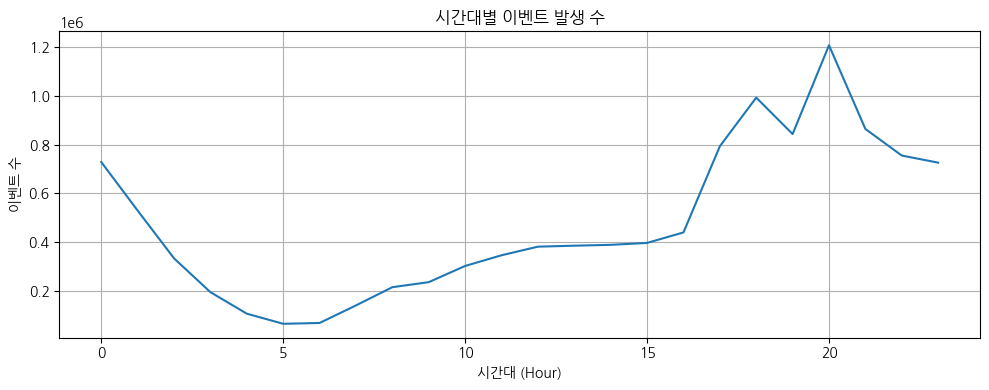

In [23]:
hackle_events_df['hour'] = hackle_events_df['event_datetime'].dt.hour
hackle_events_df['hour'].value_counts().sort_index().plot(kind='line', title='시간대별 이벤트 발생 수', figsize=(10, 4))
plt.xlabel('시간대 (Hour)')
plt.ylabel('이벤트 수')
plt.grid(True)
plt.tight_layout()
plt.show()

- 최고 활동 시간대: 오후 8시 (20시)
- 정오부터 점점 증가하며, 20시에 피크 → 퇴근/하교 후 시간대에 활동 집중
- 자정~오전 7시까지는 활동 저조 → 자연스러운 야간 휴식 패턴 반영



#### 이벤트 유형별 일별 추이 비교

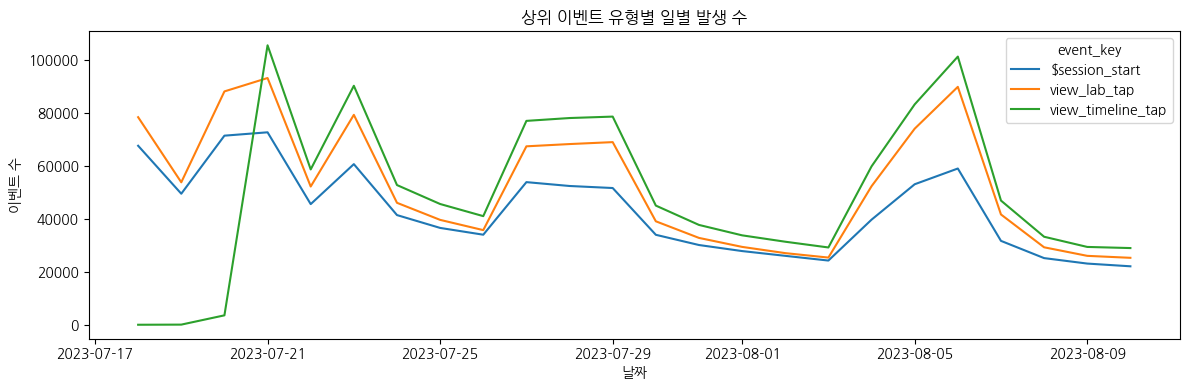

In [24]:
top_events = hackle_events_df['event_key'].value_counts().head(3).index
subset = hackle_events_df[hackle_events_df['event_key'].isin(top_events)]

event_daily = subset.groupby(['date', 'event_key']).size().unstack().fillna(0)

event_daily.plot(figsize=(12, 4), title='상위 이벤트 유형별 일별 발생 수')
plt.ylabel('이벤트 수')
plt.xlabel('날짜')
plt.tight_layout()
plt.show()


- $session_start, view_lab_tap, view_timeline_tap 모두 유사한 추세를 보임
- 8월 초~중순에 급증한 시점이 반복적으로 보임 → 이 시기에 이벤트/프로모션, 또는 사용자 유입 증가 가능성
- 세 이벤트 모두 함께 증가/감소 → 행동 흐름 상 함께 발생 가능성 높음

#### 페이지별 이벤트 발생량

<Axes: title={'center': '페이지별 이벤트 수'}, ylabel='page_name'>

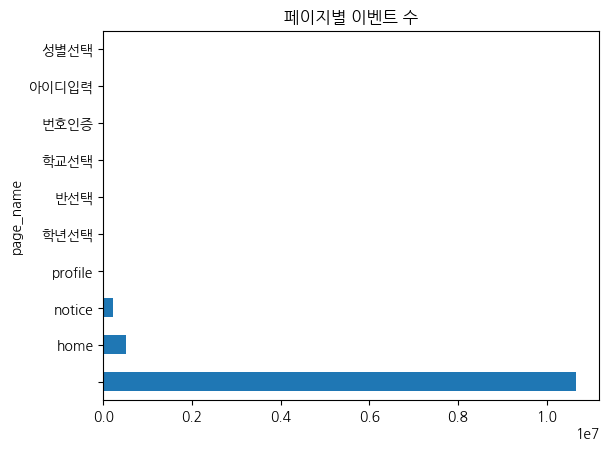

In [25]:
hackle_events_df['page_name'].value_counts().head(10).plot(kind='barh', title='페이지별 이벤트 수')

In [26]:
# 데이터 일부 샘플링 (예: 10만 건)
sample_df = hackle_events_df.sample(n=100000, random_state=42)

# datetime 형식 변환
sample_df['event_datetime'] = pd.to_datetime(sample_df['event_datetime'])

# 정렬 및 duration 계산
sample_df = sample_df.sort_values(['id', 'session_id', 'event_datetime'])
sample_df['next_event_time'] = sample_df.groupby(['id', 'session_id'])['event_datetime'].shift(-1)
sample_df['duration'] = (sample_df['next_event_time'] - sample_df['event_datetime']).dt.total_seconds()

# duration NaN 확인
print(sample_df['duration'].isna().sum(), '/', len(sample_df))


100000 / 100000


In [27]:
# 이벤트가 1개뿐인 세션 수
single_event_sessions = hackle_events_df.groupby('session_id').size().eq(1).sum()
print(f"이벤트 1개뿐인 세션 수: {single_event_sessions}")


이벤트 1개뿐인 세션 수: 2786


#### heart_balance / votes_count / friend_count 분포

array([[<Axes: title={'center': 'friend_count'}>,
        <Axes: title={'center': 'votes_count'}>],
       [<Axes: title={'center': 'heart_balance'}>, <Axes: >]],
      dtype=object)

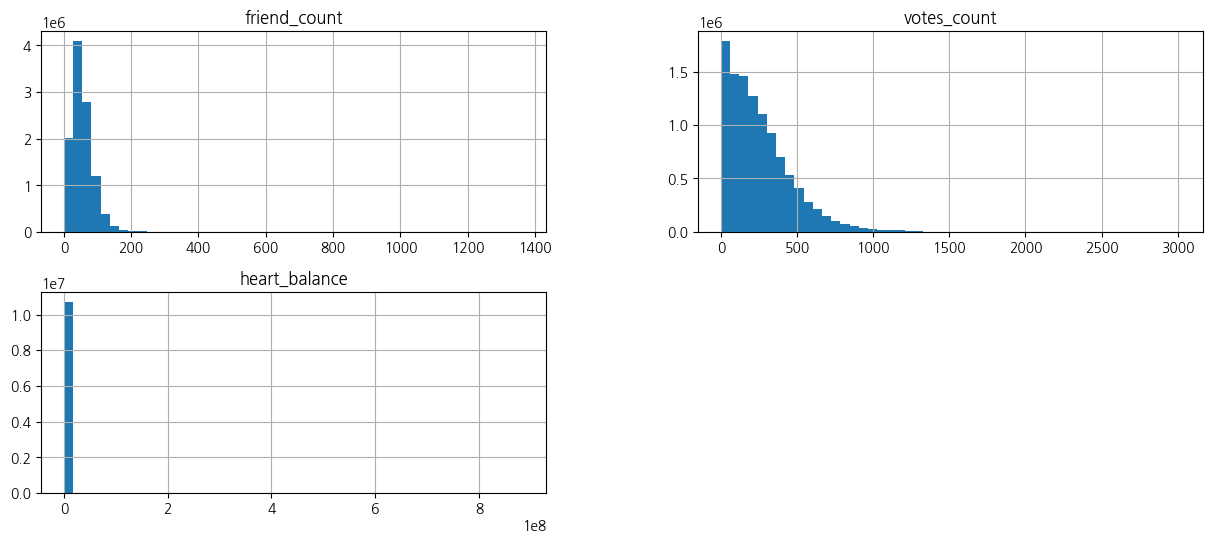

In [28]:
cols = ['friend_count', 'votes_count', 'heart_balance']
hackle_events_df[cols].hist(bins=50, figsize=(15, 6))

- 대부분의 유저가 친구 수 0~100명 사이에 분포. 일부 유저는 1000명 이상까지 있음
- 투표 수가 많지 않은 유저가 대부분. 일부 유저만 수백~천 단위
- 거의 모든 유저가 매우 적은 하트 잔고를 가짐. 소수 유저가 수억 단위 하트 소유 → 극단적 이상치 존재

In [29]:
# 상위 하트 보유 유저 Top 10 확인

top_heart_users = hackle_events_df[['id', 'heart_balance']].sort_values(by='heart_balance', ascending=False).dropna()
top_heart_users = top_heart_users.drop_duplicates(subset='id')  # 유저별로 1건만

# 상위 10명 출력
print(top_heart_users.head(10))

                                            id  heart_balance
1006182   16850d17-06ce-4bc6-a72b-10757b7cd659    884999804.0
9713235   d94966f1-2e16-432e-80e7-ffc00eafc2d4    884999804.0
5268630   75cb81e8-4bfd-4645-a891-b58fc97df458    884999804.0
5991425   85fe57ba-ba48-452a-bbc5-52df977c0e63    884999804.0
7196402   a101278d-7df5-44ca-bf32-39a3579e12f8    884999804.0
260955    05d5cd0b-d045-4b88-ad37-4a9a19060fcc    884999804.0
8930111   c7cbd8ec-2988-4b1f-8cf2-a432e93c922a    884999804.0
10195314  e41ad51d-261f-46b8-8045-133e05b1358e    884999804.0
7810866   aec37578-60cd-4ba5-8dfb-08ddf2c64f20    884999804.0
3488374   4e016293-f359-45f1-985a-07eb5e3f5971    884999804.0


In [30]:
# 하트 수 기준 분위수 확인

quantiles = hackle_events_df['heart_balance'].quantile([0.9, 0.95, 0.99, 0.999])
print("하트 잔고 분위수 (단위: 개수):")
print(quantiles)

하트 잔고 분위수 (단위: 개수):
0.900     6518.0
0.950    10120.0
0.990    20073.0
0.999    38037.0
Name: heart_balance, dtype: float64


In [31]:
# 하트 1억 이상 보유한 유저 수

high_heart_users = hackle_events_df[hackle_events_df['heart_balance'] >= 1e8]
high_heart_count = high_heart_users['id'].nunique()

print(f"하트 잔고가 1억 이상인 유저 수: {high_heart_count}")

하트 잔고가 1억 이상인 유저 수: 160


In [32]:
# high_heart_users와 원본 병합하여 행동 비교
high_ids = high_heart_users['id'].unique()
hackle_events_df['is_high_heart'] = hackle_events_df['id'].isin(high_ids)

# 이벤트 수 비교
event_counts = hackle_events_df.groupby('is_high_heart').size()
print(event_counts)

is_high_heart
False    11441159
True          160
dtype: int64


In [34]:
# 친구 수 1000명 이상 유저

high_friend_users = hackle_events_df[hackle_events_df['friend_count'] >= 1000]
print(f"1000명 이상 친구를 가진 유저 수: {len(high_friend_users)}")
high_friend_users.sort_values('friend_count', ascending=False).head()

1000명 이상 친구를 가진 유저 수: 63


,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id,date,weekday,hour,is_high_heart
7547676,a8e22026-c749-4e50-a532-2c73a27e13d0,2023-07-20 18:10:54,launch_app,4b6PjoCgNbR9iA00M5fBVYVTdAE2,a8e22026-c749-4e50-a532-2c73a27e13d0,,,1365.0,826.0,8831.0,NaN,2023-07-20,Thursday,18,False
5037067,709f2c00-7eb1-4f4e-9c3a-33b41918923c,2023-07-20 18:10:54,$session_start,4b6PjoCgNbR9iA00M5fBVYVTdAE2,709f2c00-7eb1-4f4e-9c3a-33b41918923c,,,1365.0,826.0,8831.0,NaN,2023-07-20,Thursday,18,False
175672,03eefba2-bed3-416c-8a12-f4a188b90f98,2023-07-24 04:03:36,click_appbar_friend_plus,ae4d67ed-324e-4133-8d86-a441f2d29e40,03eefba2-bed3-416c-8a12-f4a188b90f98,,,1261.0,251.0,3851.0,NaN,2023-07-24,Monday,4,False
6056038,877126eb-29c9-417b-9e6e-3e25117c3dce,2023-07-24 04:04:55,click_question_ask,ae4d67ed-324e-4133-8d86-a441f2d29e40,877126eb-29c9-417b-9e6e-3e25117c3dce,,home,1261.0,251.0,3851.0,NaN,2023-07-24,Monday,4,False
6386249,8ed75f06-5eaa-4e24-8c7b-f6082255beb7,2023-07-20 20:17:28,click_bottom_navigation_profile,ae4d67ed-324e-4133-8d86-a441f2d29e40,8ed75f06-5eaa-4e24-8c7b-f6082255beb7,,,1261.0,251.0,3851.0,NaN,2023-07-20,Thursday,20,False


In [35]:
# 투표 수 1000개 이상 유저

high_vote_users = hackle_events_df[hackle_events_df['votes_count'] >= 1000]
print(f"1000개 이상 투표를 한 유저 수: {len(high_vote_users)}")
high_vote_users.sort_values('votes_count', ascending=False).head()

1000개 이상 투표를 한 유저 수: 98433


,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id,date,weekday,hour,is_high_heart
8636924,c140c027-01da-4b6a-a2e5-246d218586be,2023-08-09 12:12:29,click_question_start,10EE881B-F308-4735-9AEA-C7F9666A3A70,c140c027-01da-4b6a-a2e5-246d218586be,,home,33.0,3017.0,70143.0,NaN,2023-08-09,Wednesday,12,False
4016127,59c9a07d-515d-4e37-aa0a-665a421463d9,2023-08-10 12:24:37,click_notice_detail,10EE881B-F308-4735-9AEA-C7F9666A3A70,59c9a07d-515d-4e37-aa0a-665a421463d9,,notice,33.0,3017.0,70143.0,NaN,2023-08-10,Thursday,12,False
582922,0d0a3d96-4ec7-4243-9d1a-9dc32009a3d4,2023-08-10 01:47:28,$session_start,10EE881B-F308-4735-9AEA-C7F9666A3A70,0d0a3d96-4ec7-4243-9d1a-9dc32009a3d4,,,33.0,3017.0,70143.0,NaN,2023-08-10,Thursday,1,False
2377115,352c289c-6bc7-4950-ba48-709d87f50ff2,2023-08-09 12:39:07,click_notice_detail,10EE881B-F308-4735-9AEA-C7F9666A3A70,352c289c-6bc7-4950-ba48-709d87f50ff2,,notice,33.0,3017.0,70143.0,NaN,2023-08-09,Wednesday,12,False
11354249,fe0b44da-0ff0-4609-b8d3-2a2f9f0a6d55,2023-08-09 22:39:18,click_notice_detail,10EE881B-F308-4735-9AEA-C7F9666A3A70,fe0b44da-0ff0-4609-b8d3-2a2f9f0a6d55,,notice,33.0,3017.0,70143.0,NaN,2023-08-09,Wednesday,22,False


In [58]:
# 친구 수 or 투표 수 기준 상위 유저 병합 확인

outlier_users = hackle_events_df[
    (hackle_events_df['friend_count'] >= 1000) | (hackle_events_df['votes_count'] >= 1000)
]
print(f"친구수 또는 투표수 기준 이상 사용자 수: {len(outlier_users)}")

친구수 또는 투표수 기준 이상 사용자 수: 98496


In [38]:
hackle_events_df['is_outlier'] = (
    (hackle_events_df['friend_count'] >= 1000) | (hackle_events_df['votes_count'] >= 1000)
)

hackle_events_df.groupby('is_outlier')[['heart_balance', 'friend_count', 'votes_count']].mean()


,heart_balance,friend_count,votes_count
is_outlier,,,
False,16335.552150,54.080158,248.266136
True,9129.000548,82.665296,1225.640056


#### 질문(question_id) 기준으로 많이 조회된 질문 Top 10

In [21]:

hackle_events_df['question_id'].value_counts().dropna().head(10)

question_id
1629.0    403
5051.0    342
4435.0    338
5127.0    334
5039.0    329
5007.0    327
2518.0    317
4240.0    316
4884.0    311
4583.0    310
Name: count, dtype: int64

#### click_friend_invite 이벤트 이후 행동 흐름 분석

In [4]:
print(hackle_events_df.columns.tolist())


['event_id', 'event_datetime', 'event_key', 'session_id', 'id', 'item_name', 'page_name', 'friend_count', 'votes_count', 'heart_balance', 'question_id']


In [11]:
# 초대한 유저 1~2명만 샘플로 추출
sample_user = inviter_df['user_id'].unique()[0]

# 해당 유저의 전체 행동 시계열 확인
hackle_events_df[hackle_events_df['user_id'] == sample_user].sort_values('event_datetime')


,event_id,event_datetime,event_key,session_id,user_id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
4739,001bd0f0-c572-413b-8bfb-38319c9eb143,2023-07-28 08:04:58,click_friend_invite,45b9991b-0117-4116-bf61-d6026a19fd19,001bd0f0-c572-413b-8bfb-38319c9eb143,,home,17.0,4.0,442.0,NaN


In [12]:
print("초대한 유저 수:", inviter_df['user_id'].nunique())
print("전체 이벤트 유저 수:", hackle_events_df['user_id'].nunique())


초대한 유저 수: 3221
전체 이벤트 유저 수: 11441319


---

# 2. hackle_properties

In [3]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"
# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/hackle/hackle_properties.parquet'

# 데이터 불러오기
hackle_properties_df = pd.read_parquet(gcs_path, engine='pyarrow')
hackle_properties_df.head()

,id,session_id,user_id,language,osname,osversion,versionname,device_id
0,1,4OzYh3seq3VKytpSn5pvQkZNQii1,,ko-KR,iOS,16.0,2.0.0,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
1,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279
2,3,6bcea65d-9f40-46fc-888c-700fe707483f,1545130,ko,Android,13,2.0.5,6bcea65d-9f40-46fc-888c-700fe707483f
3,4,XVYNT6zfhFWqIg9omwg2AHDjTLx2,1224793,ko,Android,13,2.0.5,a05c1595-3e05-434b-8684-218b528bd725
4,5,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,1329450,ko-US,iOS,16.5.1,2.0.5,EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3


In [4]:
hackle_properties_df.shape


(525350, 8)

In [5]:
hackle_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525350 entries, 0 to 525349
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           525350 non-null  int64 
 1   session_id   525350 non-null  object
 2   user_id      525350 non-null  object
 3   language     525350 non-null  object
 4   osname       525350 non-null  object
 5   osversion    525350 non-null  object
 6   versionname  525350 non-null  object
 7   device_id    525350 non-null  object
dtypes: int64(1), object(7)
memory usage: 32.1+ MB


In [6]:
hackle_properties_df.isnull().sum()

id             0
session_id     0
user_id        0
language       0
osname         0
osversion      0
versionname    0
device_id      0
dtype: int64

In [15]:
(hackle_properties_df == '').sum()

id                 0
session_id         0
user_id        82255
language           0
osname             0
osversion          0
versionname        0
device_id          0
dtype: int64

In [7]:
hackle_properties_df.describe(include='all')

,id,session_id,user_id,language,osname,osversion,versionname,device_id
count,525350.000000,525350,525350,525350,525350,525350,525350,525350
unique,NaN,253616,327381,151,2,74,16,251720
top,NaN,040914e1-61ac-40ef-b76a-718066d880dc,,ko-KR,iOS,16.5.1,2.0.5,040914e1-61ac-40ef-b76a-718066d880dc
freq,NaN,9,82255,340900,359479,218699,309644,9
mean,262675.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,151655.626297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,131338.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,262675.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,394012.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(hackle_properties_df['session_id'].duplicated().sum())
print(hackle_properties_df['device_id'].duplicated().sum())
print(hackle_properties_df['user_id'].duplicated().sum())

271734
273630
197969


In [9]:
hackle_properties_df['device_id'].value_counts().head(10)

device_id
040914e1-61ac-40ef-b76a-718066d880dc    9
2EFB7401-B868-4E88-A91D-5C0D34AA45E5    8
09D46910-FB6E-4ECF-A425-D117D0BDC2BB    8
63799B19-7B7C-4D84-85D2-912708D0BD80    7
D4F83BFB-0670-4D5E-8D9B-9D7B4BFC4AED    7
A35959B2-82B3-4FE6-A1C8-620CD6FF37DA    7
3639406E-3302-4856-82A4-371852CCF57E    7
75B6230F-5EB8-49E6-9A25-4B279FD4AAFE    7
0FFE3878-EBA3-4386-8C4A-B3D867DC8B7F    7
083d6d9e-88b4-4646-8901-14a789f502b5    7
Name: count, dtype: int64

- device_id 기준 상위 10개 다중 사용 디바이스의 이벤트 수는 매우 높다 (7~9회)                    
- 자동화된 접근 또는 특정 테스트 디바이스일 가능성                

In [10]:
hackle_properties_df['language'].value_counts().head(20)

language
ko-KR         340900
ko            164682
en-KR           9658
ko-US           4931
en              1122
en-GB            513
en-US            502
ko-JP            465
ko-CA            330
ja-KR            306
ko-GP            267
ko-GH            119
ko-CN            110
ko-GU            108
ko-GG             88
ru-KR             81
ko-GB             74
ja                60
ko-AU             56
zh-Hans-KR        54
Name: count, dtype: int64

In [11]:
hackle_properties_df['osname'].unique()

array(['iOS', 'Android'], dtype=object)

In [12]:
hackle_properties_df['osversion'].value_counts().head(10)

osversion
16.5.1    218699
13        112112
12         32611
16.6       31126
16.3.1     22012
16.0       19622
16.2       14389
10         10229
16.1.1      9890
11          6521
Name: count, dtype: int64

- 16.5.1 버전이 약 41% 차지 (218,699/525,350)

In [ ]:
# 다중 세션 사용자

hackle_properties_df.groupby('user_id')['session_id'].nunique().describe()

count    327381.000000
mean          1.247626
std         136.665205
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       78197.000000
Name: session_id, dtype: float64

In [ ]:
# 다중 기기 사용자

hackle_properties_df.groupby('user_id')['device_id'].nunique().describe()

count    327381.000000
mean          1.246545
std         135.350918
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       77445.000000
Name: device_id, dtype: float64

#### 사용자 행동 기반 세분화

In [16]:
# 'user_id'가 빈 문자열인 경우 익명 유저로 분류
hackle_properties_df['is_anonymous'] = hackle_properties_df['user_id'] == ''

In [17]:
# user_id별 session_id 개수 계산
session_count = hackle_properties_df.groupby('user_id')['session_id'].nunique()

# 고빈도/저빈도 기준: 중위수 이상을 고빈도로 설정
median_sessions = session_count.median()
user_freq_class = session_count.apply(lambda x: 'high' if x >= median_sessions else 'low')

# 결과를 원본에 병합
hackle_properties_df = hackle_properties_df.merge(user_freq_class.rename('session_freq_class'), left_on='user_id', right_index=True, how='left')


In [18]:
# user_id별 device_id 고유 개수
device_count = hackle_properties_df.groupby('user_id')['device_id'].nunique()

# 단일 vs 다중 기준: device 수 == 1 → 단일
user_device_class = device_count.apply(lambda x: 'single' if x == 1 else 'multiple')

# 결과 병합
hackle_properties_df = hackle_properties_df.merge(user_device_class.rename('device_class'), left_on='user_id', right_index=True, how='left')


In [19]:
# 로그인 유무: is_anonymous
# 접속 빈도: session_freq_class
# 디바이스 수: device_class

# 조합 예시
hackle_properties_df.groupby(['is_anonymous', 'session_freq_class', 'device_class']).size().reset_index(name='user_count')


,is_anonymous,session_freq_class,device_class,user_count
0,False,high,multiple,7666
1,False,high,single,435429
2,True,high,multiple,82255


- 로그인 유저	고빈도	단일 디바이스	435,429
   - 일반적인 정규 사용자. 세션이 많지만 하나의 디바이스만 사용
- 로그인 유저	고빈도	다중 디바이스	7,666
   - 여러 디바이스로 접속. 공유 계정 또는 의심 사용자 가능성
- 익명 유저	고빈도	다중 디바이스	82,255
   - 로그인 없이 여러 디바이스로 자주 접속. 비정상/테스트/봇 가능성 매우 높음

In [20]:
anon_mult_users = hackle_properties_df[
    (hackle_properties_df['is_anonymous']) &
    (hackle_properties_df['device_class'] == 'multiple')
]
anon_mult_users['language'].value_counts().head(10)

language
ko-KR    54989
ko       24071
en-KR     1510
ko-US      812
en         171
en-US       92
ko-JP       88
en-GB       82
ja-KR       60
ko-CA       43
Name: count, dtype: int64

In [21]:
login_multi_users = hackle_properties_df[
    (~hackle_properties_df['is_anonymous']) &
    (hackle_properties_df['device_class'] == 'multiple')
]
login_multi_users['user_id'].value_counts().head(10)

user_id
1578652    17
1459833    13
1571506    13
1285353    12
1239584    12
1388873    12
855879     12
910934     11
1398551    10
1301920    10
Name: count, dtype: int64

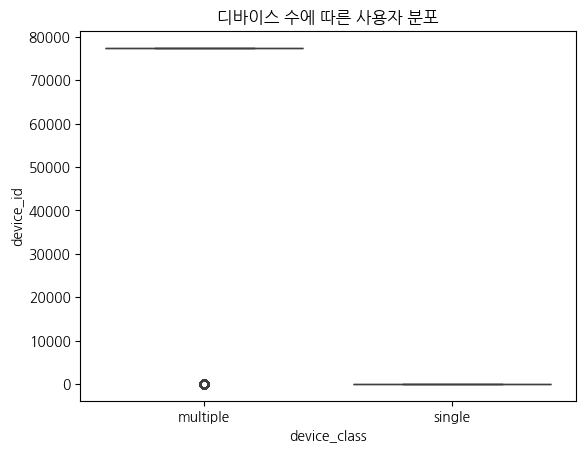

In [22]:
sns.boxplot(data=hackle_properties_df, x='device_class', y=hackle_properties_df.groupby('user_id')['device_id'].transform('nunique'))
plt.title("디바이스 수에 따른 사용자 분포")
plt.show()

---

# 3. device_properties

In [24]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"
# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/hackle/device_properties.parquet'

# 데이터 불러오기
device_properties_df = pd.read_parquet(gcs_path, engine='pyarrow')
device_properties_df

,id,device_id,device_model,device_vendor
0,1,000007C9-E103-4EB5-9777-A9084D4952DF,"iPhone14,7",Apple
1,2,00002245-458F-4CDD-8533-B448CD43DBD2,"iPhone14,7",Apple
2,3,00012620-313A-4502-9F8D-8DAB7443215B,"iPhone14,5",Apple
3,4,000137bc-80de-4bb5-b61d-df7f217a4501,SM-F711N,samsung
4,5,000227D6-B782-4367-91C4-486B76DF9E37,"iPhone12,3",Apple
...,...,...,...,...
252375,252376,FFFE54E6-48F9-4262-A487-94E944B1B68C,"iPhone14,4",Apple
252376,252377,FFFE80D2-6B57-41AF-9CD6-8E616CC7BFDE,"iPhone14,7",Apple
252377,252378,FFFED16A-DAF6-40A1-865D-29C4D1302DA5,"iPhone14,4",Apple
252378,252379,FFFEEA5E-C4D9-4BB7-A9E4-3715455B69AD,"iPhone12,8",Apple


In [25]:
device_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252380 entries, 0 to 252379
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             252380 non-null  int64 
 1   device_id      252380 non-null  object
 2   device_model   252380 non-null  object
 3   device_vendor  252380 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.7+ MB


In [26]:
device_properties_df.isnull().sum()

id               0
device_id        0
device_model     0
device_vendor    0
dtype: int64

In [27]:
device_properties_df.describe(include='all')

,id,device_id,device_model,device_vendor
count,252380.000000,252380,252380,252380
unique,NaN,251720,522,36
top,NaN,5dab2e2f-54fd-4c4d-9996-1cccfa6c7428,"iPhone14,5",Apple
freq,NaN,2,27656,174444
mean,126190.500000,NaN,NaN,NaN
std,72855.974806,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,63095.750000,NaN,NaN,NaN
50%,126190.500000,NaN,NaN,NaN
75%,189285.250000,NaN,NaN,NaN


In [28]:
device_properties_df['device_vendor'].value_counts(normalize=True).head(10) * 100

device_vendor
Apple       69.119582
samsung     30.068547
LGE          0.625248
Xiaomi       0.112529
OnePlus      0.019415
Google       0.012283
LENOVO       0.009509
Chinoe       0.007528
FYD          0.002774
motorola     0.002377
Name: proportion, dtype: float64

In [30]:
top_models = device_properties_df['device_model'].value_counts().head(5).index
bottom_models = device_properties_df['device_model'].value_counts().tail(5).index

top_df = device_properties_df[device_properties_df['device_model'].isin(top_models)]
bottom_df = device_properties_df[device_properties_df['device_model'].isin(bottom_models)]

top_df, bottom_df

(            id                             device_id device_model  \
 0            1  000007C9-E103-4EB5-9777-A9084D4952DF   iPhone14,7   
 1            2  00002245-458F-4CDD-8533-B448CD43DBD2   iPhone14,7   
 2            3  00012620-313A-4502-9F8D-8DAB7443215B   iPhone14,5   
 6            7  00039F52-AC9A-4474-A645-DFE225C56753   iPhone14,7   
 9           10  0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD   iPhone14,4   
 ...        ...                                   ...          ...   
 252372  252373  FFFD88D6-7B5D-4F92-9ADC-3DD413177588   iPhone15,2   
 252373  252374  FFFDBEFD-0039-437C-9EF3-EBCAD41FD544   iPhone14,5   
 252375  252376  FFFE54E6-48F9-4262-A487-94E944B1B68C   iPhone14,4   
 252376  252377  FFFE80D2-6B57-41AF-9CD6-8E616CC7BFDE   iPhone14,7   
 252377  252378  FFFED16A-DAF6-40A1-865D-29C4D1302DA5   iPhone14,4   
 
        device_vendor  
 0              Apple  
 1              Apple  
 2              Apple  
 6              Apple  
 9              Apple  
 ...          

---

# 4. user_properties

In [3]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"
# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/hackle/user_properties.parquet'

# 데이터 불러오기
user_properties_df = pd.read_parquet(gcs_path, engine='pyarrow')
user_properties_df

,user_id,class,gender,grade,school_id
0,1000000,1,M,1,1885
1,1000009,10,F,2,3869
2,1000012,10,F,1,5091
3,1000013,8,F,2,1743
4,1000015,2,F,3,5078
...,...,...,...,...,...
230814,999992,1,M,2,2240
230815,999996,5,M,2,365
230816,999997,2,M,3,2502
230817,nhj4wh46MAf5K0IHDu4DGyRsdWn2,5,F,2,3499


In [4]:
user_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230819 entries, 0 to 230818
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    230819 non-null  object
 1   class      230819 non-null  int64 
 2   gender     230819 non-null  object
 3   grade      230819 non-null  int64 
 4   school_id  230819 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 8.8+ MB


In [5]:
user_properties_df.isnull().sum()

user_id      0
class        0
gender       0
grade        0
school_id    0
dtype: int64

In [7]:
user_properties_df.describe(include='all')

,user_id,class,gender,grade,school_id
count,230819,230819.000000,230819,230819.000000,230819.000000
unique,230819,NaN,2,NaN,NaN
top,1000000,NaN,F,NaN,NaN
freq,1,NaN,132610,NaN,NaN
mean,NaN,4.594999,NaN,2.002197,3083.383335
std,NaN,3.151979,NaN,0.762048,1711.671162
min,NaN,1.000000,NaN,1.000000,1.000000
25%,NaN,2.000000,NaN,1.000000,1594.000000
50%,NaN,4.000000,NaN,2.000000,3138.000000
75%,NaN,6.000000,NaN,3.000000,4640.000000


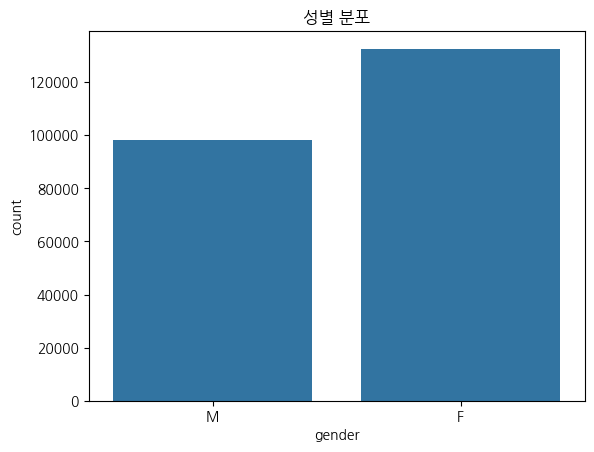

In [8]:
sns.countplot(data=user_properties_df, x='gender')
plt.title('성별 분포')
plt.show()

- 여성(F): 약 132,610명 (약 57.4%)
- 남성(M): 약 98,209명 (약 42.6%)
- 전체적으로 여학생 비중이 더 높음

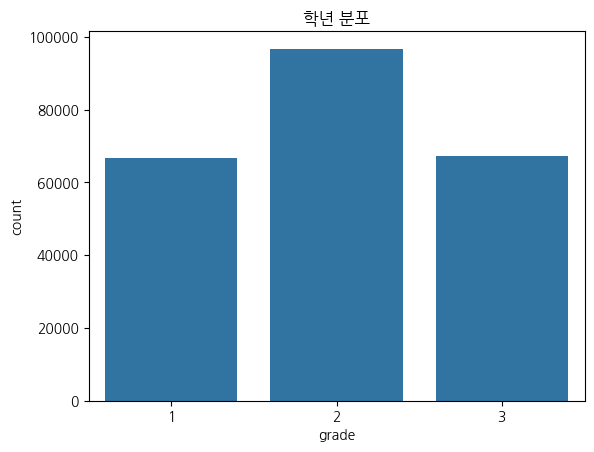

In [9]:
sns.countplot(data=user_properties_df, x='grade')
plt.title('학년 분포')
plt.show()


In [10]:
pd.crosstab(user_properties_df['grade'], user_properties_df['gender'], normalize='index')

gender,F,M
grade,,
1,0.547157,0.452843
2,0.606140,0.393860
3,0.556188,0.443812


- 2학년은 여학생 비중이 가장 높음              
→ 타겟 세분화 전략 시 2학년 여학생 = 핵심 사용자층

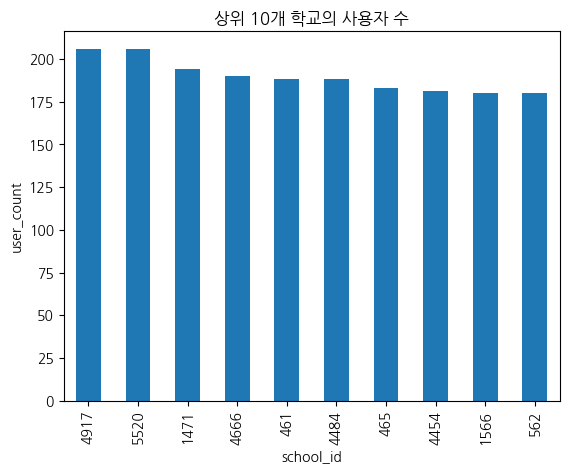

In [11]:
user_properties_df['school_id'].value_counts().head(10).plot(kind='bar')
plt.title('상위 10개 학교의 사용자 수')
plt.xlabel('school_id')
plt.ylabel('user_count')
plt.show()

In [12]:
user_properties_df.groupby(['grade', 'class']).size().unstack().fillna(0).astype(int)

class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
grade,,,,,,,,,,,,,,,,,,,,
1,9176,8753,8110,7532,7110,6478,5838,4821,3360,2714,1346,907,363,163,39,4,4,5,2,42
2,15948,14234,13024,11842,10410,8708,6876,5178,3574,2671,1221,727,275,144,99,53,50,75,47,1622
3,11456,10557,9657,8719,7455,6152,4648,3335,2107,1573,744,406,165,113,52,10,13,11,8,93


---

---

# 추가 hackle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

## 0430 ~ 0505

In [2]:

# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/추가hackle데이터/2023-04-30.parquet'

# 데이터 불러오기
hackle_230430_df = pd.read_parquet(gcs_path, engine='pyarrow')
hackle_230430_df

,Asia/Seoul,event_key,session_id,user_id,value,user_properties,hackle_properties,event_properties,id,device_id
0,2023-05-01T00:00:00.024Z,button,jgGFnoyc6GWuGIEgjp3nUoKRQbF3,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...","{'description': '다음', 'location': 'signotherin...",96d1336f-744b-4deb-a6a4-207494419dbf,cfc34eab-6930-488b-8109-70d37cec7dae
1,2023-05-01T00:00:00.025Z,button,n3PI8GZnRFOKpJslIRgckMeRiln1,None,0.0,[],"{'language': 'ko-CA', 'isapp': 'true', 'osvers...","{'description': 'vote 선택', 'location': 'homevo...",2825d1b1-8325-42e2-88eb-8cae61d3a26d,0dde2ecb-ff03-440f-98f3-94f20978b796
2,2023-05-01T00:00:00.029Z,button,L31Dl8vRtdWPJ8XC0gGs1mPwzJH2,None,0.0,[],"{'language': 'ko', 'isapp': 'true', 'osversion...","{'description': '친구선택', 'location': 'homeenque...",335b0a36-9ecf-41a9-b7d2-e27125e521ef,b50774ed-24ce-49e1-9383-945ff3aea9ff
3,2023-05-01T00:00:00.036Z,button,QjToElcYNkVxszJDHBhqtITlzDJ3,None,0.0,[],"{'language': 'ko', 'isapp': 'true', 'osversion...","{'description': '이름 셔플!', 'location': 'homeenq...",b730bb6a-589a-4074-89a1-87f11a03f9d6,0999c6b6-c579-4c0f-916c-9a113010f84a
4,2023-05-01T00:00:00.063Z,button,VRpXf303RGU730fIO4EjWstzAJi1,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...","{'description': '앱바 뒤로가기', 'location': 'homefr...",c2a5fd3f-92d5-4864-8e0e-63e563898499,45985493-ed35-4cc5-935f-1bcf922e213c
...,...,...,...,...,...,...,...,...,...,...
8588417,2023-05-06T23:59:59.168Z,$session_end,96348488-4d6a-49a8-8995-452718157fd7,None,0.0,[],"{'language': 'ko', 'isapp': 'true', 'osversion...","{'description': None, 'location': None, 'sessi...",8f2fe201-6e6a-49c8-9988-b6f7ac540372,96348488-4d6a-49a8-8995-452718157fd7
8588418,2023-05-06T23:59:59.496Z,$session_end,9e9c7a7a-5efc-470b-8ecf-e3f6a102bda6,None,0.0,[],"{'language': 'ko', 'isapp': 'true', 'osversion...","{'description': None, 'location': None, 'sessi...",c0eaf066-9638-41f2-88cd-2dddca84ac4b,9e9c7a7a-5efc-470b-8ecf-e3f6a102bda6
8588419,2023-05-06T23:59:59.543Z,$session_end,60DD632C-010F-4689-A997-1E17E7368C9F,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...","{'description': None, 'location': None, 'sessi...",76ae7486-ca23-4911-9f9b-ceed6b4b0f23,60dd632c-010f-4689-a997-1e17e7368c9f
8588420,2023-05-06T23:59:59.602Z,$session_start,lfu6e5HTwdQvbkSmOHppzJA585N2,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...","{'description': None, 'location': None, 'sessi...",f460a877-eba1-45bd-9fbf-2604efce6d82,d9246f1a-f9cf-440f-ba36-07ed71836c4a


---

## 0506 ~ 0511

In [3]:

# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/추가hackle데이터/2023-05-06.parquet'

# 데이터 불러오기
hackle_230506_df = pd.read_parquet(gcs_path, engine='pyarrow')
hackle_230506_df.head()

,Asia/Seoul,event_key,session_id,user_id,value,user_properties,hackle_properties,event_properties,id,device_id
0,2023-05-07T00:00:00.014Z,$session_end,OoWMTpTWpUa4m8I1RiKOk75Xnvs1,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1683384973159.076d488c'},af49a3ac-cf10-49c9-a846-75c6350a331e,498dbc0f-4537-41dc-93ec-f4406302a3b0
1,2023-05-07T00:00:00.159Z,$session_end,CrFi87nvwiVvHExxP9uSfIHOmBy1,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1683377977126.ecbb48be'},ea3608d7-51f7-417f-9560-484896fb265d,7770afa8-e228-4736-aa2a-658ebe2e3d25
2,2023-05-07T00:00:00.244Z,$session_end,W6frWgWJtbWTJwdm6eVWPGKwY2Y2,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1683385158861.10bc1ad8'},0d9da666-4047-4d40-a5ac-992876799cf4,9fbdc45d-a74a-4d9f-9d40-0f400b72877e
3,2023-05-07T00:00:00.255Z,$session_start,4EFB4D45-0AAF-424A-8E4E-2F19249C8892,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1683385200255.b26bcb8c'},947d1fff-5e4c-44e2-b106-f23cddbe0dc4,4efb4d45-0aaf-424a-8e4e-2f19249c8892
4,2023-05-07T00:00:00.316Z,$session_start,JdxVFvtz6AcxxOZVvl6plHayjYJ3,None,0.0,[],"{'language': 'ko', 'isapp': 'true', 'osversion...",{'sessionid': '1683385200316.4c60e55a'},28e3afe4-098a-4bef-a699-4e3fa325b3ab,96348488-4d6a-49a8-8995-452718157fd7


---

## 0512~ 0517

In [2]:

# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/추가hackle데이터/2023-05-12.parquet'

# 데이터 불러오기
hackle_230512_df = pd.read_parquet(gcs_path, engine='pyarrow')
hackle_230512_df.head()

: 

---

## 0518 ~ 0523

In [3]:

# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/추가hackle데이터/2023-05-18.parquet'

# 데이터 불러오기
hackle_230518_df = pd.read_parquet(gcs_path, engine='pyarrow')
hackle_230518_df.head()

,Asia/Seoul,event_key,session_id,user_id,value,user_properties,hackle_properties,event_properties,id,device_id
0,2023-05-19T00:00:00.033Z,$session_start,nALWgF7izudSzKXArsiAOaYYsr23,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684422000033.4a700b18'},6fca7599-9f28-4cc1-9345-f97622e4b4fa,c370e36d-b84c-4c97-af37-db356caf1741
1,2023-05-19T00:00:00.038Z,$session_end,E9A0131C-A70A-4917-88D8-257223F0A767,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684421975647.1dc71535'},2446011e-cad8-4a3b-9f5e-be8a0cad502f,e9a0131c-a70a-4917-88d8-257223f0a767
2,2023-05-19T00:00:00.068Z,$session_start,euhK4oLwdGPVT6sPNNN1Rs7xEKz1,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684422000068.2f677e10'},9d7899af-f7b5-4620-89b6-b5f1c5a6e3f1,2ab9b1b1-41a7-4f6e-af31-85daac4509ea
3,2023-05-19T00:00:00.087Z,$session_start,TYAFQPAWozbqfQ3I296QuXJnWrx1,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684422000087.caece7d8'},e5bb81b9-d29d-4a31-9157-3e91ee53f7ff,c3236b64-a328-4743-8afd-461f85f1f1e0
4,2023-05-19T00:00:00.102Z,$session_start,XhhuxAQvEcXdlD1JjbPC8H3AF602,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684422000102.f169ebee'},8d10a9bb-6929-4e69-98fe-6f59dfcbd96a,efe3418d-ad59-4a20-a5f9-43d2195d1a08


---

## 0524 ~ 0616

In [3]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/추가hackle데이터/2023-05-24.parquet'

# 데이터 불러오기
hackle_230524_df = pd.read_parquet(gcs_path, engine='pyarrow')
hackle_230524_df.head()

,Asia/Seoul,event_key,session_id,user_id,value,user_properties,hackle_properties,event_properties,id,device_id
0,2023-05-25T00:00:00.219Z,$session_start,TeeVVRGrpuXE5q6f7pAu9ULVNvG3,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684940400219.62ee4573'},75b35f77-565e-47d2-b12e-91848a30b6e4,b6afceaa-cc9c-4a66-b92f-9e202f9eb328
1,2023-05-25T00:00:00.224Z,$session_start,9tcpOeHvyldCUXMgRyFVQI86rf13,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684940400224.df939c47'},20a73b83-a331-4d0f-8d96-09ccb796ba4e,54a8af4d-47bf-4951-87c2-1817b26d1c31
2,2023-05-25T00:00:00.275Z,$session_start,aiDrtN8uHiQXRXmLMJhf27hKA4B3,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684940400275.457b984b'},eb282c48-17e1-46b7-badd-8a2145901ffe,b08ee1df-0bc6-4b38-9474-8cbc55fd6f17
3,2023-05-25T00:00:00.369Z,$session_start,Oqmt3cCrCQZAa0TT3B4s2kTOG1k1,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684940400369.db2cd3ea'},f466ccc8-f453-4008-b319-47a28ae844f9,ace73d0e-04d6-4d03-9460-a0a1143253f7
4,2023-05-25T00:00:00.493Z,$session_start,GA1Nz2ehK2TmsRcqBzXQn6hkDHH2,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684940400493.8e886f45'},a7c5252f-0969-423d-8098-3372c9614a47,2adda5ce-1d37-43cd-8cbd-c75c06f84f74


---

## 0617 ~ 0622